#### Обработка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pymc3 import  *

%matplotlib inline

In [2]:
from scipy import optimize as opt 
import scipy
import scipy.odr as odr

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
data = pd.read_csv('data/experiment.csv') # Считываем данные
table = pd.read_csv('data/table.csv') # Считываем табличные значения

In [5]:
data.head(5) # Посмотрим на несколько значений

,T,I,U
0,943,0.635,2.50
1,1803,1.116,8.27
2,943,0.639,2.58
3,1000,0.690,3.04
4,1000,0.683,2.97


In [6]:
table.head(5)

,T,e_T
0,800,0.067
1,900,0.081
2,1000,0.105
3,1100,0.119
4,1200,0.133


In [7]:
data['I'] = 0.1 * data['I']

In [8]:
data['W'] = data['I'] * data['U']

In [9]:
data['T_abs'] = 1.057 * (data['T'] + 275) - 34.95

In [10]:
data_sorted = data.sort_values('T_abs')

In [11]:
data_sorted[:5]

,T,I,U,W,T_abs
0,943,0.0635,2.50,0.158750,1252.476
2,943,0.0639,2.58,0.164862,1252.476
3,1000,0.0690,3.04,0.209760,1312.725
4,1000,0.0683,2.97,0.202851,1312.725
5,1050,0.0798,4.16,0.331968,1365.575


In [12]:
data_sorted = data_sorted.drop(data_sorted.index[[23, 24]])

In [13]:
data_sorted['err_W'] = data_sorted['U'] * 0.001 + data_sorted['I'] * 0.01

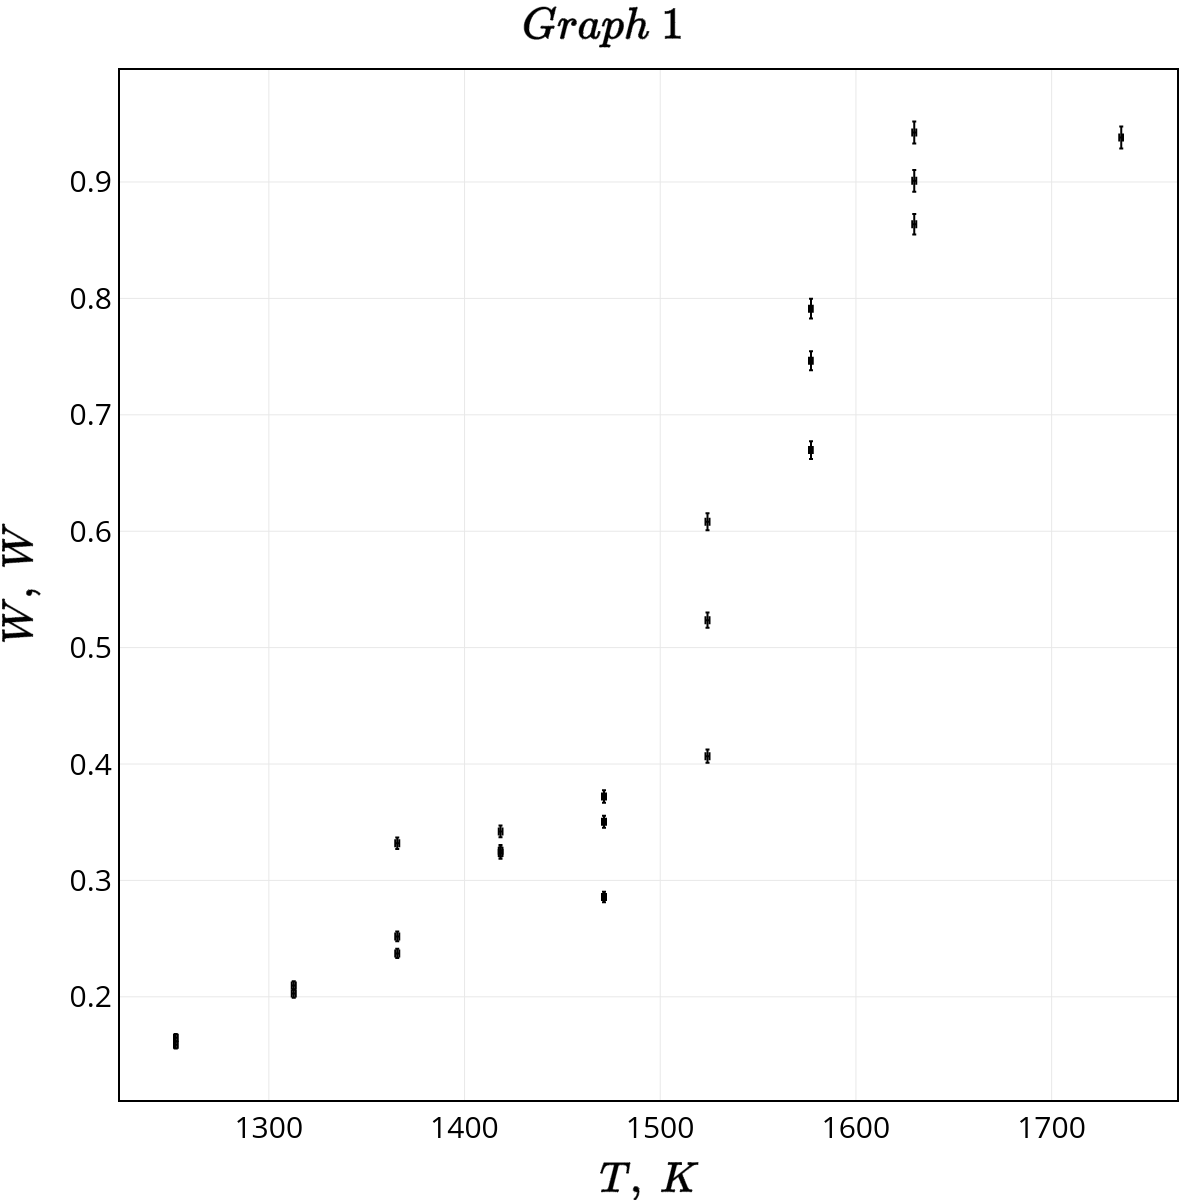

In [14]:
trace1 = go.Scatter(
    x = data_sorted['T_abs'],
    y = data_sorted['W'],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = data_sorted['err_W'],
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 1.,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 1,
        opacity = 1,
        color = '#000000'
    )
)

trace0 = [trace1]

layout = go.Layout(
    title = "$Graph~1$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$T,~K$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$W,~W$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [15]:
B = 0.36 * (0.01)**2 * 5.67 * 10**(-8)

In [16]:
from scipy import interpolate
f = interpolate.interp1d(table['T'], table['e_T'])

In [17]:
x = np.arange(800, 2000, 50)

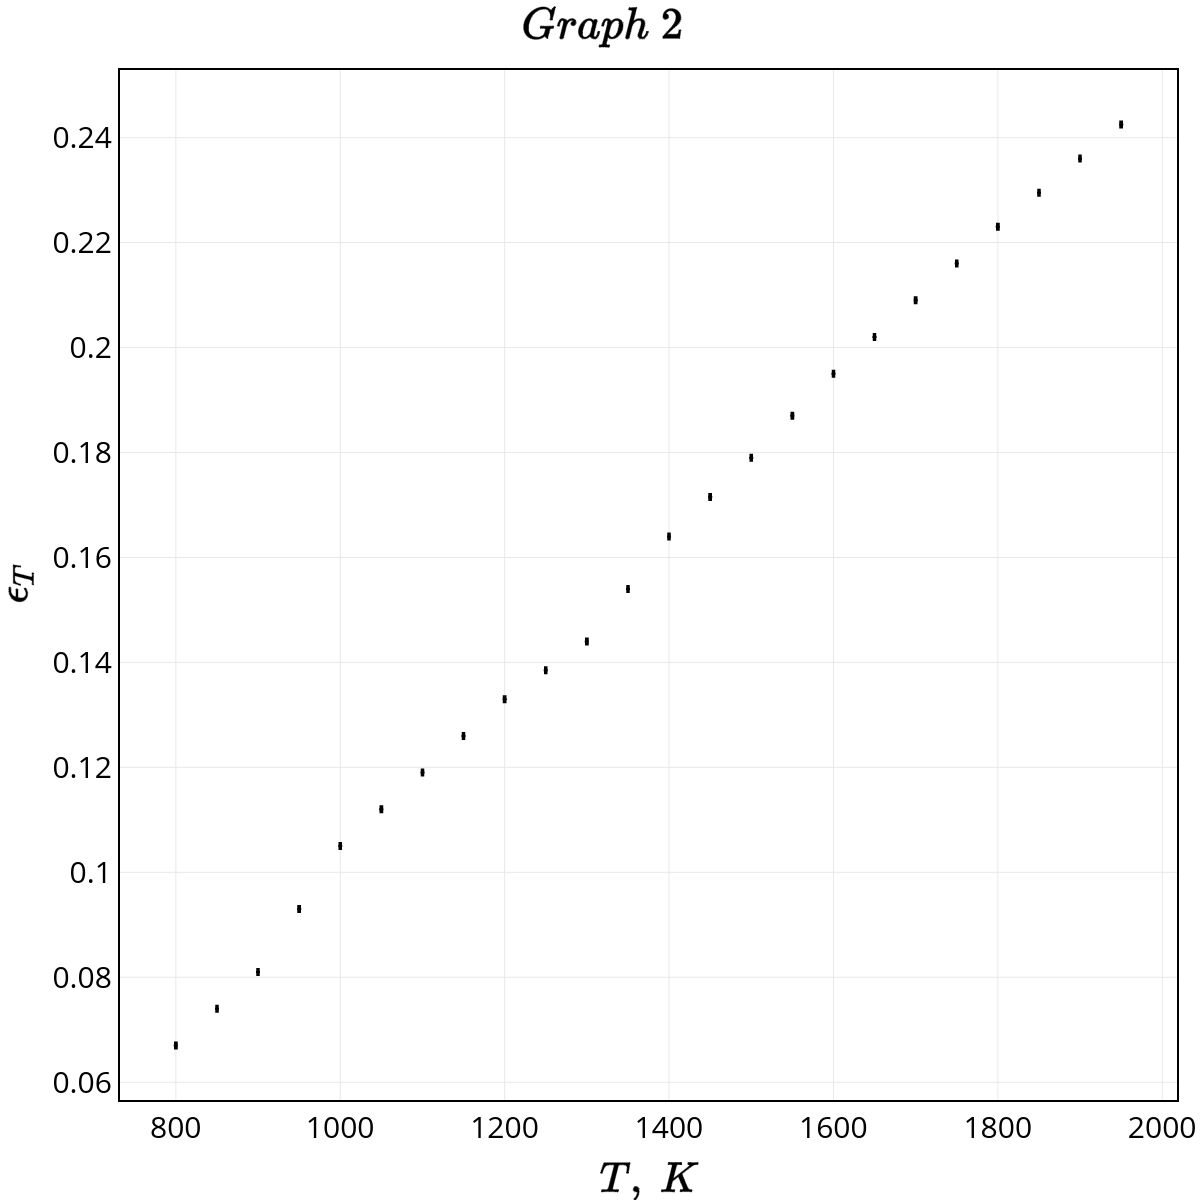

In [18]:
trace1 = go.Scatter(
    x = table['T'],
    y = table['e_T'],
    mode = 'markers',
    error_y = dict(
        type = 'constant',
        value = 0.,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 1.,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 1,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = x,
    y = f(x),
    mode = 'markers',
    error_y = dict(
        type = 'constant',
        value = 0.,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 1.,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 1,
        opacity = 1,
        color = '#000000'
    )
)


trace0 = [trace2]

layout = go.Layout(
    title = "$Graph~2$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$T,~K$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\epsilon_T$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

In [19]:
data_sorted['e_T'] = f(data_sorted['T'])

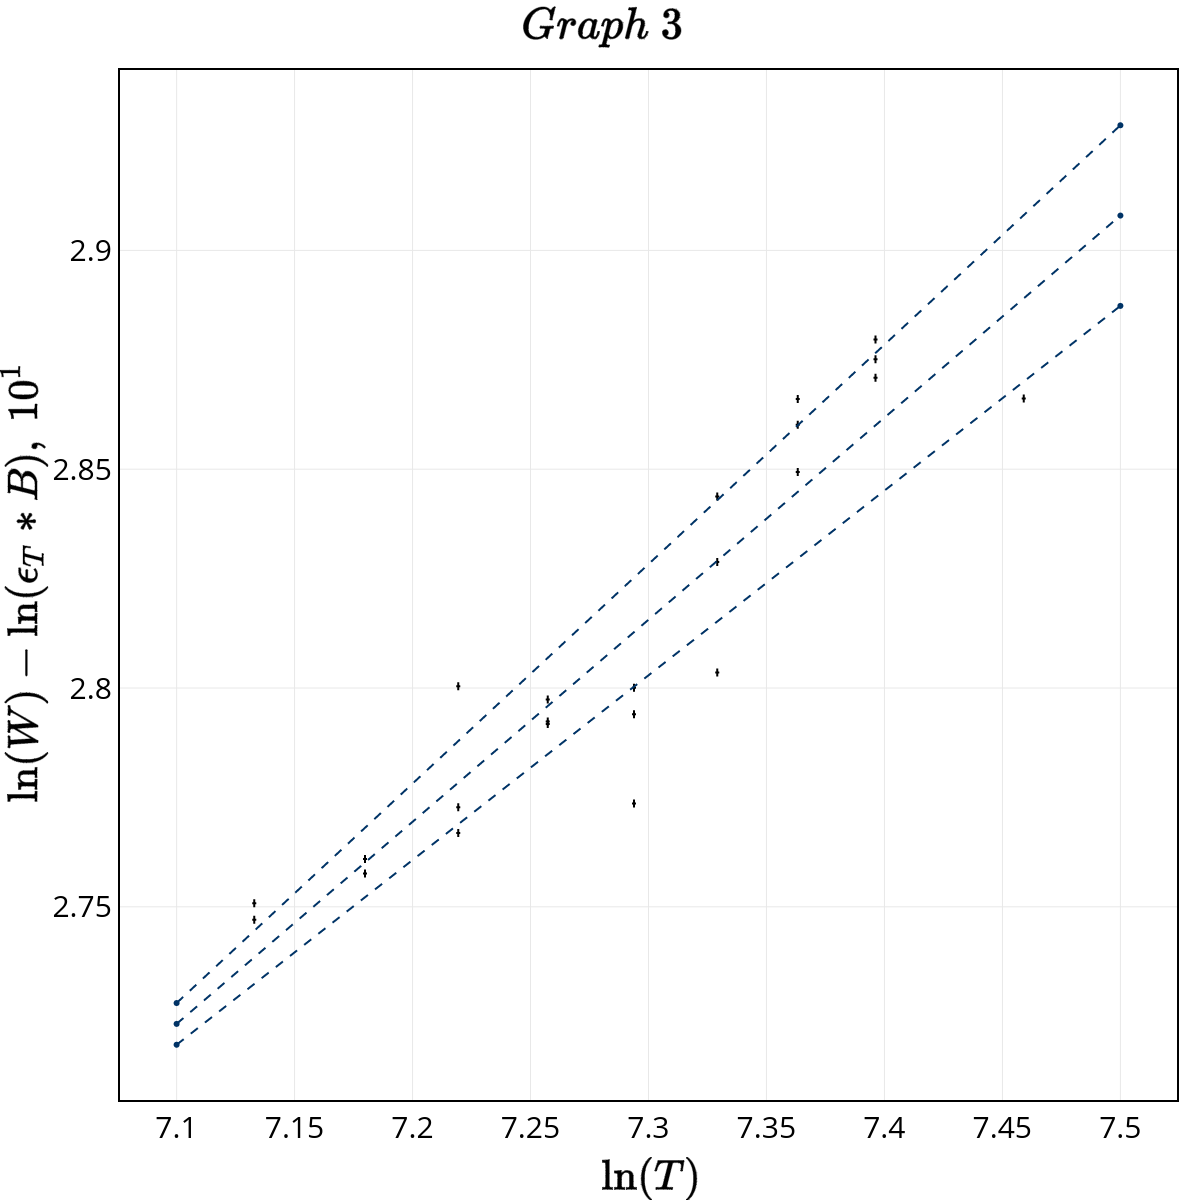

In [21]:
trace1 = go.Scatter(
    x = np.log(data_sorted['T_abs']),
    y = (np.log(data_sorted['W']) - np.log(data_sorted['e_T'] * B)) / 10,
    mode = 'markers',
    error_y = dict(
        type = 'constant',
        value = 0.,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 1,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [7.1, 7.5],
    y = [(4.61770405 * 7.1 - 5.55320656) / 10, (4.61770405 * 7.5 -5.55320656) / 10],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace3 = go.Scatter(
    x = [7.1, 7.5],
    y = [((4.61770405 +  0.39685294) * 7.1 - 5.55320656 - 2.77) / 10, ((4.61770405 +  0.39685294) * 7.5 - 5.55320656 - 2.77) / 10],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace4 = go.Scatter(
    x = [7.1, 7.5],
    y = [((4.61770405 -  0.39685294) * 7.1 - 5.55320656 + 2.77) / 10, ((4.61770405 - 0.39685294) * 7.5 - 5.55320656 + 2.77) / 10],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = "$Graph~3$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$\ln(T)$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\ln(W) - \ln(\epsilon_T * B),~10^{1}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)

In [22]:
data_sorted['sigma'] = data_sorted['W'] / data_sorted['e_T'] / (0.36 * (0.01)**2) / data_sorted['T']**4

In [23]:
data_sorted['sigma']

0     6.106587e-08
2     6.341696e-08
3     5.549206e-08
4     5.366429e-08
5     6.773584e-08
6     4.842498e-08
7     5.138830e-08
8     5.157979e-08
9     5.454621e-08
10    5.189754e-08
13    4.690872e-08
12    3.601945e-08
11    4.416113e-08
14    4.097117e-08
15    5.273258e-08
16    6.125108e-08
17    5.501324e-08
18    6.499627e-08
19    6.131653e-08
20    6.085125e-08
21    5.833045e-08
22    6.365396e-08
23    4.136758e-08
Name: sigma, dtype: float64

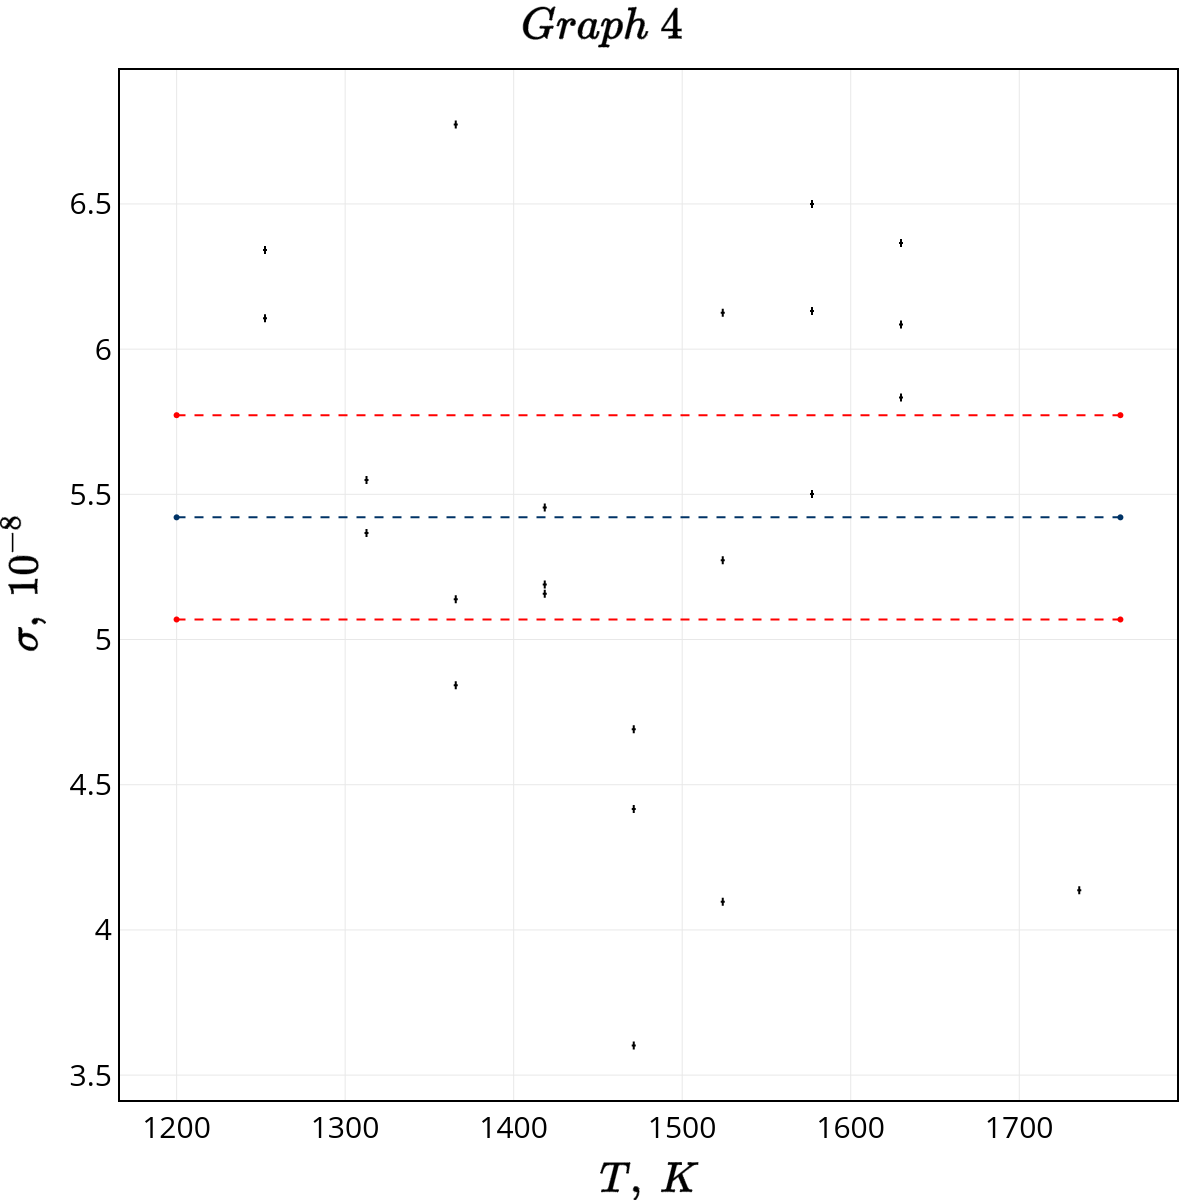

In [24]:
trace1 = go.Scatter(
    x = data_sorted['T_abs'],
    y = data_sorted['sigma'] * 10**8,
    mode = 'markers',
    error_y = dict(
        type = 'constant',
        value = 0.,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 1,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [1200, 1760],
    y = [5.420805, 5.420805],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace3 = go.Scatter(
    x = [1200, 1760],
    y = [(5.420805 + 2. * 0.175887), (5.420805 + 2. * 0.175887)],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace4 = go.Scatter(
    x = [1200, 1760],
    y = [(5.420805 - 2. * 0.175887), (5.420805 - 2. * 0.175887)],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = "$Graph~4$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$T,~K$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sigma, ~10^{-8}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot4.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot4.png", width=500)

In [25]:
Y = np.reshape(np.array(data_sorted['sigma'] * 10**8), (1, len(data_sorted['sigma'] * 10**8)))
X = np.reshape(np.array(data_sorted['T_abs']), (1, len(np.array(data_sorted['T_abs']))))
def f(x, b):
    return b 
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print(parameters_opt_1)
print(np.sqrt(np.diag(parameters_cov_1)))

[ 5.42080545]
[ 0.17588685]


In [26]:
Y = np.reshape(np.array((np.log(data_sorted['W']) - np.log(data_sorted['e_T'] * B))), (1, len((np.log(data_sorted['W']) - np.log(data_sorted['e_T'] * B)))))
X = np.reshape(np.array(np.log(data_sorted['T_abs'])), (1, len(np.array(np.log(data_sorted['T_abs'])))))
def f(x, b, c):
    return b * x + c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print(parameters_opt_1)
print(np.sqrt(np.diag(parameters_cov_1)))

[ 4.61770396 -5.55320656]
[ 0.39685293  2.8931287 ]
